In [28]:
import json
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import functools

In [141]:
dataset_name = "ufop"
ref = "02"
results_path = f"results/{ref}/{dataset_name}/"

In [142]:
if dataset_name == "minds":
    dataset_normalized_name = "MINDS-Libras"
    num_person = 12
    categories = ["To happen", "Student", "Yellow", "America", "To enjoy", "Candy", "Bank", "Bathroom", "Noise", "Five", "To know", "Mirror", "Corner", "Son", "Apple", "Fear", "Bad", "Frog", "Vaccine", "Will"]
else:
    dataset_normalized_name = "LIBRAS-UFOP"
    num_person = 5
    categories = ["Year 1", "Year 2", "Year 3", "Day 1", "Day 2", "Day 3", "Week 1", "Week", "Yesterday", "Day before yesterday", "Safe", "Physiotherapy", "Idea", "Stamp", "Record", "Effort", "Defend", "Physical education", "Bodybuilding", "Battle", "Close", "Screw up", "Bicycle", "Slip", "Always", "Build", "Calumny", "Work", "Television", "Love", "Learn", "Analyze", "Talk", "Cock", "Hen", "Interact", "Exchange", "Strong wind", "Weak wind", "Strong rain", "Weak rain", "Run fast", "Run slow", "Takes great care", "Takes a little care", "Thin", "Fat", "Strong", "Weak", "Arrive", "Win", "Loss", "Open", "Nothing", "Nobody", "Not"]

In [143]:
def id_list_to_categories(ids):
    return [categories[i] for i in ids]

In [144]:
results = []
for file in os.listdir(results_path):
    if file.endswith(".json"):
        with open(os.path.join(results_path, file), "r") as f:
            results.append(json.load(f))

In [145]:
results[0].keys()

dict_keys(['dataset_name', 'frames', 'seed', 'epochs', 'last_epoch', 'optimizer_parameters', 'test_people', 'validate_people', 'resnet_fc_layer', 'history', 'true_labels', 'predicted_labels', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'precision_per_test_class'])

In [146]:
accuracies = [{
    "test_accuracy": r["test_accuracy"],
    "test_people": r["test_people"][0],
    "validate_people": r["validate_people"][0],
} for r in results]

In [147]:
print("Accuracy:", sum([i["test_accuracy"] for i in results]) / len(results))
print("std: $\pm$", np.std(np.array([i["test_accuracy"] for i in results])))

Accuracy: 0.8458655900575819
std: $\pm$ 0.034733308438769726


In [148]:
print("Precision:", sum([i["test_precision"] for i in results]) / len(results))
print("std: $\pm$", np.std(np.array([i["test_precision"] for i in results])))

Precision: 0.8810325476992142
std: $\pm$ 0.1892519649097921


In [149]:
print("Recall:", sum([i["test_recall"] for i in results]) / len(results))
print("std: $\pm$", np.std(np.array([i["test_recall"] for i in results])))

Recall: 0.842489663298195
std: $\pm$ 0.036247504758765856


In [150]:
print("F1 Score:", sum([i["test_f1_score"] for i in results]) / len(results))
print("std: $\pm$", np.std(np.array([i["test_f1_score"] for i in results])))

F1 Score: 0.8221532916270056
std: $\pm$ 0.044421277101777026


In [151]:
for i in range(1, num_person + 1):
    accuracies.append({
        "test_accuracy": -1,
        "test_people": i,
        "validate_people": i,
    })

In [152]:
df = pd.DataFrame.from_dict(accuracies)

In [153]:
df

,test_accuracy,test_people,validate_people
0,0.820679,2,1
1,0.883683,3,1
2,0.893654,4,1
3,0.855000,5,1
4,0.807754,1,2
5,0.885299,3,2
6,0.873070,4,2
7,0.876667,5,2
8,0.827141,1,3
9,0.827141,2,3


In [154]:
df = pd.pivot_table(df, values="test_accuracy", index="test_people", columns="validate_people")

In [155]:
df.describe()

validate_people,1,2,3,4,5
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.488726,0.490102,0.454962,0.473808,0.456582
std,0.832589,0.833658,0.813706,0.824437,0.814854
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.823910,0.805331,0.778333,0.793215,0.781906
50%,0.853333,0.876667,0.827141,0.841680,0.802908
75%,0.880452,0.880789,0.827141,0.865000,0.833603
max,0.885935,0.887722,0.842196,0.869144,0.864494


Text(50.722222222222214, 0.5, 'Test signaler')

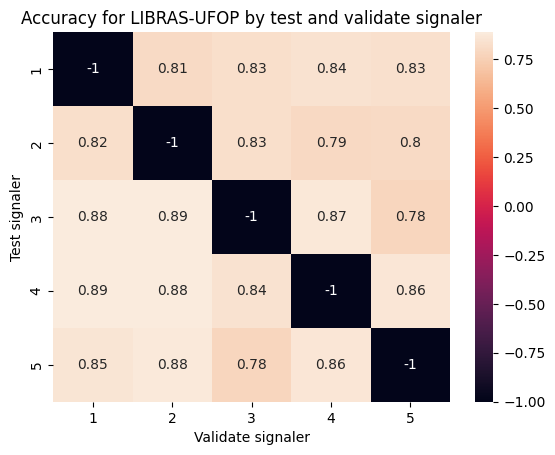

In [156]:
sns.heatmap(df, annot=True)
plt.title(f"Accuracy for {dataset_normalized_name} by test and validate signaler")
plt.xlabel("Validate signaler")
plt.ylabel("Test signaler")

In [157]:
from sklearn.metrics import accuracy_score, classification_report

def precision_per_class(true_labels, predicted_labels):
    # Calculate overall accuracy
    overall_accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Generate classification report
    report = classification_report(true_labels, predicted_labels, output_dict=True)
    
    # Extract accuracy per class from the report
    accuracy_per_class = {}
    for class_label, metrics in report.items():
        if class_label.isdigit():
            accuracy_per_class[class_label] = metrics['precision']
    
    return accuracy_per_class

In [158]:
def accuracy_per_class(true_labels, predicted_labels):
    # Initialize variables to store counts of correct and total predictions per class
    class_counts = {}
    class_correct_counts = {}
    
    # Iterate over true and predicted labels simultaneously
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        # Increment total count for the class
        if true_label in class_counts:
            class_counts[true_label] += 1
        else:
            class_counts[true_label] = 1
        
        # Increment correct count if prediction is correct
        if true_label == predicted_label:
            if true_label in class_correct_counts:
                class_correct_counts[true_label] += 1
            else:
                class_correct_counts[true_label] = 1
    
    # Calculate accuracy per class
    accuracy_per_class = {}
    for class_label in class_counts:
        if class_label in class_correct_counts:
            accuracy_per_class[class_label] = class_correct_counts[class_label] / class_counts[class_label]
        else:
            accuracy_per_class[class_label] = 0.0  # No correct predictions for this class
    
    return accuracy_per_class

In [159]:
accuracies_per_class = []
for r in results:
    for category, accuracy in accuracy_per_class(r["true_labels"], r["predicted_labels"]).items():
        accuracies_per_class.append({
            "test_people": r["test_people"][0],
            "category": category,
            "accuracy": accuracy
        })

In [160]:
df_acc = pd.DataFrame.from_dict(accuracies_per_class)

In [161]:
df_acc

,test_people,category,accuracy
0,2,0,0.363636
1,2,1,1.000000
2,2,2,0.100000
3,2,3,0.818182
4,2,4,1.000000
...,...,...,...
1507,4,51,1.000000
1508,4,52,1.000000
1509,4,53,1.000000
1510,4,54,1.000000


In [162]:
df_acc = pd.pivot_table(df_acc, values="accuracy", index="test_people", columns="category")

In [163]:
df_acc.mean()

category
0     0.442667
1     0.840000
2     0.144667
3     0.362303
4     0.830545
5     0.278111
6     0.637111
7     0.964667
8     1.000000
9     0.859333
10    0.970186
11    0.908062
12    0.984667
13    0.974825
14    0.987692
15    0.823230
16    0.959048
17    0.889697
18    1.000000
19    0.996364
20    0.775245
21    0.921111
22    0.721333
23    0.976270
24    1.000000
25    0.833991
26    0.962000
27    0.782020
28    0.858182
29    0.769823
30    0.984359
31    0.754406
32    0.862121
33    0.924222
34    0.376000
35    0.762424
36    0.924242
37    0.985091
38    0.952000
39    0.772762
40    0.951333
41    0.868667
42    0.625091
43    0.992667
44    1.000000
45    1.000000
46    0.930000
47    0.917879
48    0.714000
49    0.973333
50    0.770000
51    0.818000
52    0.932000
53    0.956667
54    0.993333
55    0.876485
dtype: float64

In [164]:
results[0].keys()

dict_keys(['dataset_name', 'frames', 'seed', 'epochs', 'last_epoch', 'optimizer_parameters', 'test_people', 'validate_people', 'resnet_fc_layer', 'history', 'true_labels', 'predicted_labels', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'precision_per_test_class'])

In [165]:
best_run = max(results, key=lambda i: i["test_accuracy"])
worst_run = min(results, key=lambda i: i["test_accuracy"])

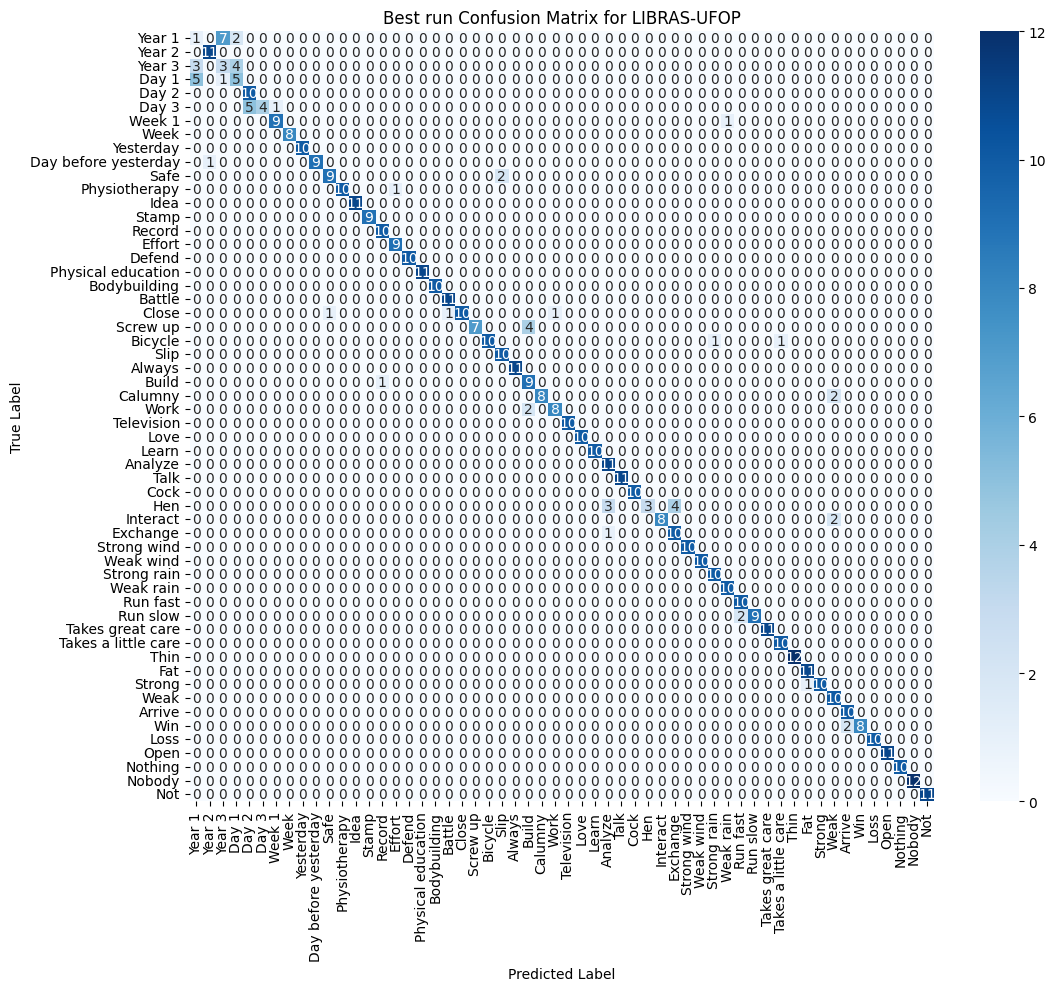

In [166]:
conf_matrix = confusion_matrix(best_run["true_labels"], best_run["predicted_labels"])
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Best run Confusion Matrix for " + dataset_normalized_name)
plt.show()

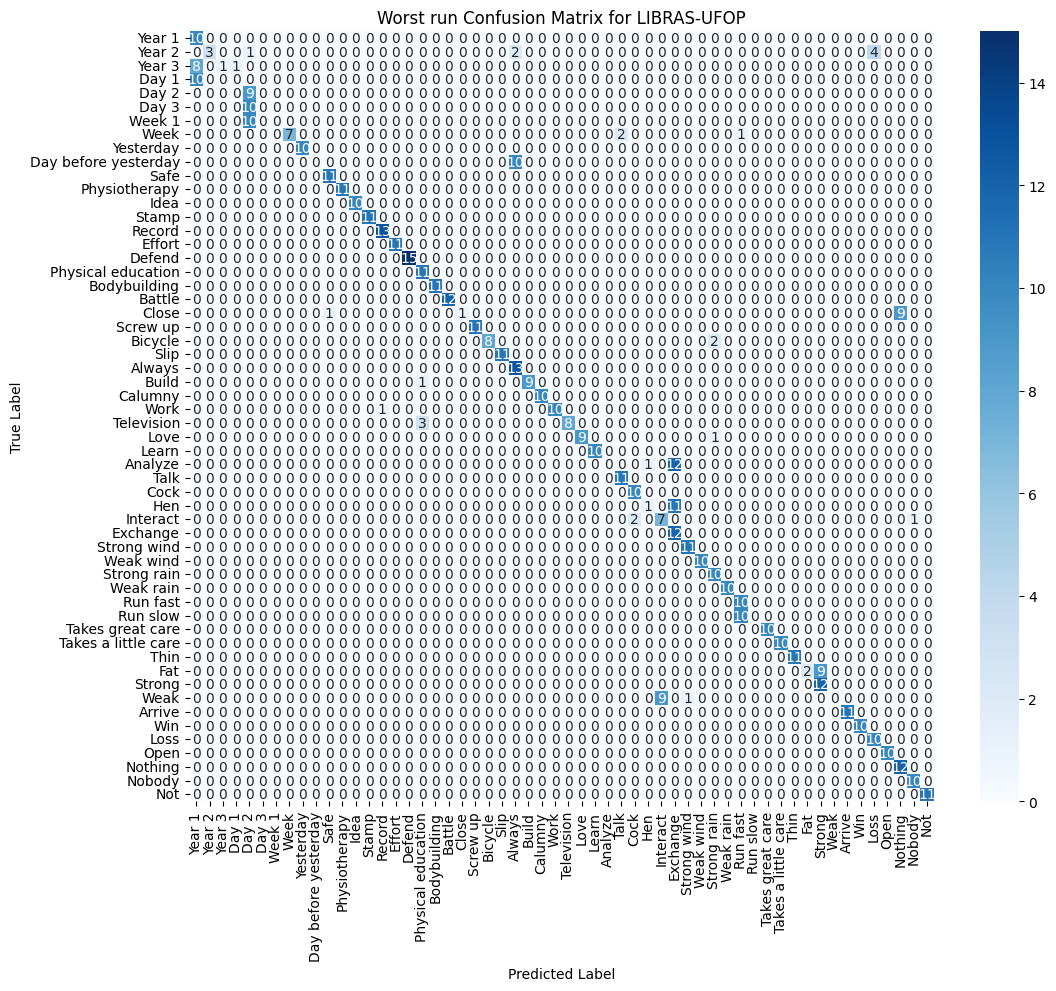

In [167]:
conf_matrix = confusion_matrix(worst_run["true_labels"], worst_run["predicted_labels"])
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Worst run Confusion Matrix for " + dataset_normalized_name)
plt.show()

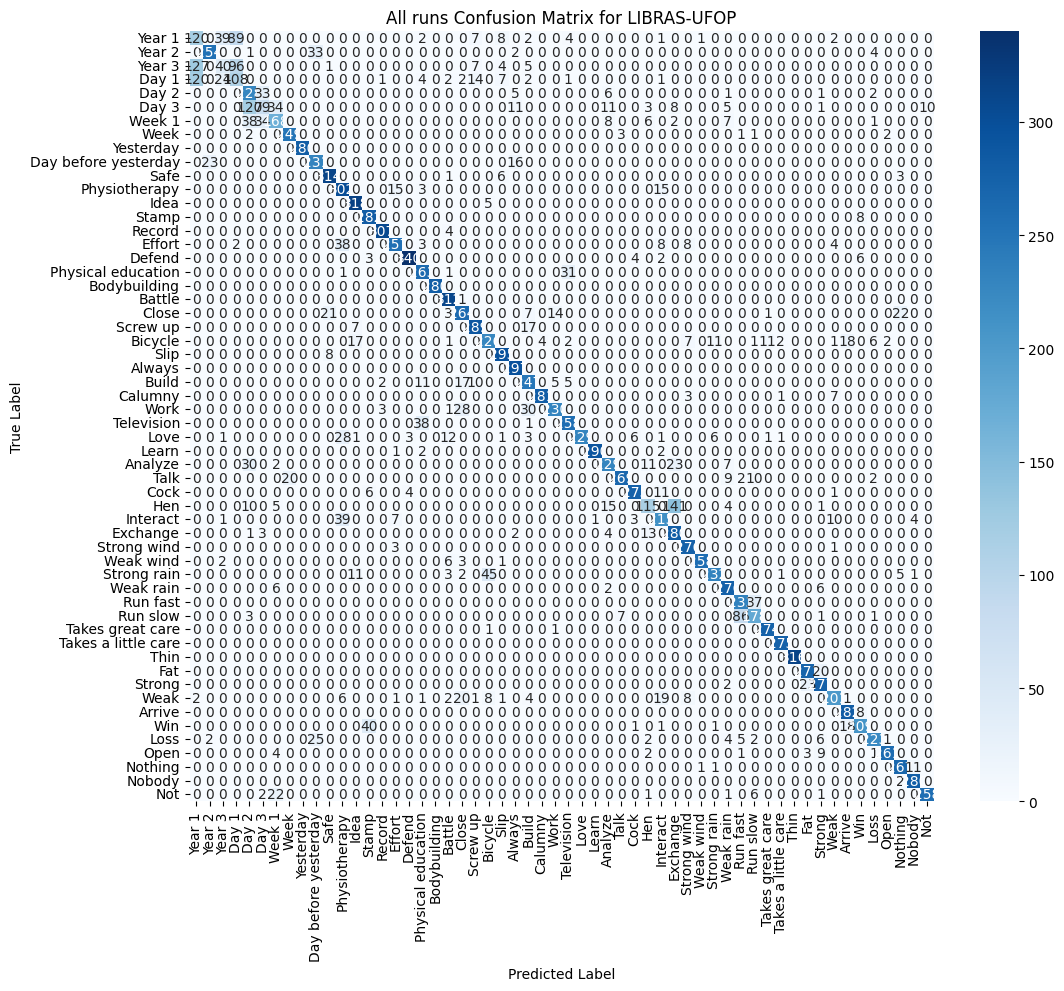

In [168]:
all_true_labels = functools.reduce(lambda a, b: a+b, [i["true_labels"] for i in results])
all_predicted_labels = functools.reduce(lambda a, b: a+b, [i["predicted_labels"] for i in results])

conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("All runs Confusion Matrix for " + dataset_normalized_name)
plt.show()

In [169]:
from matplotlib.pyplot import figure

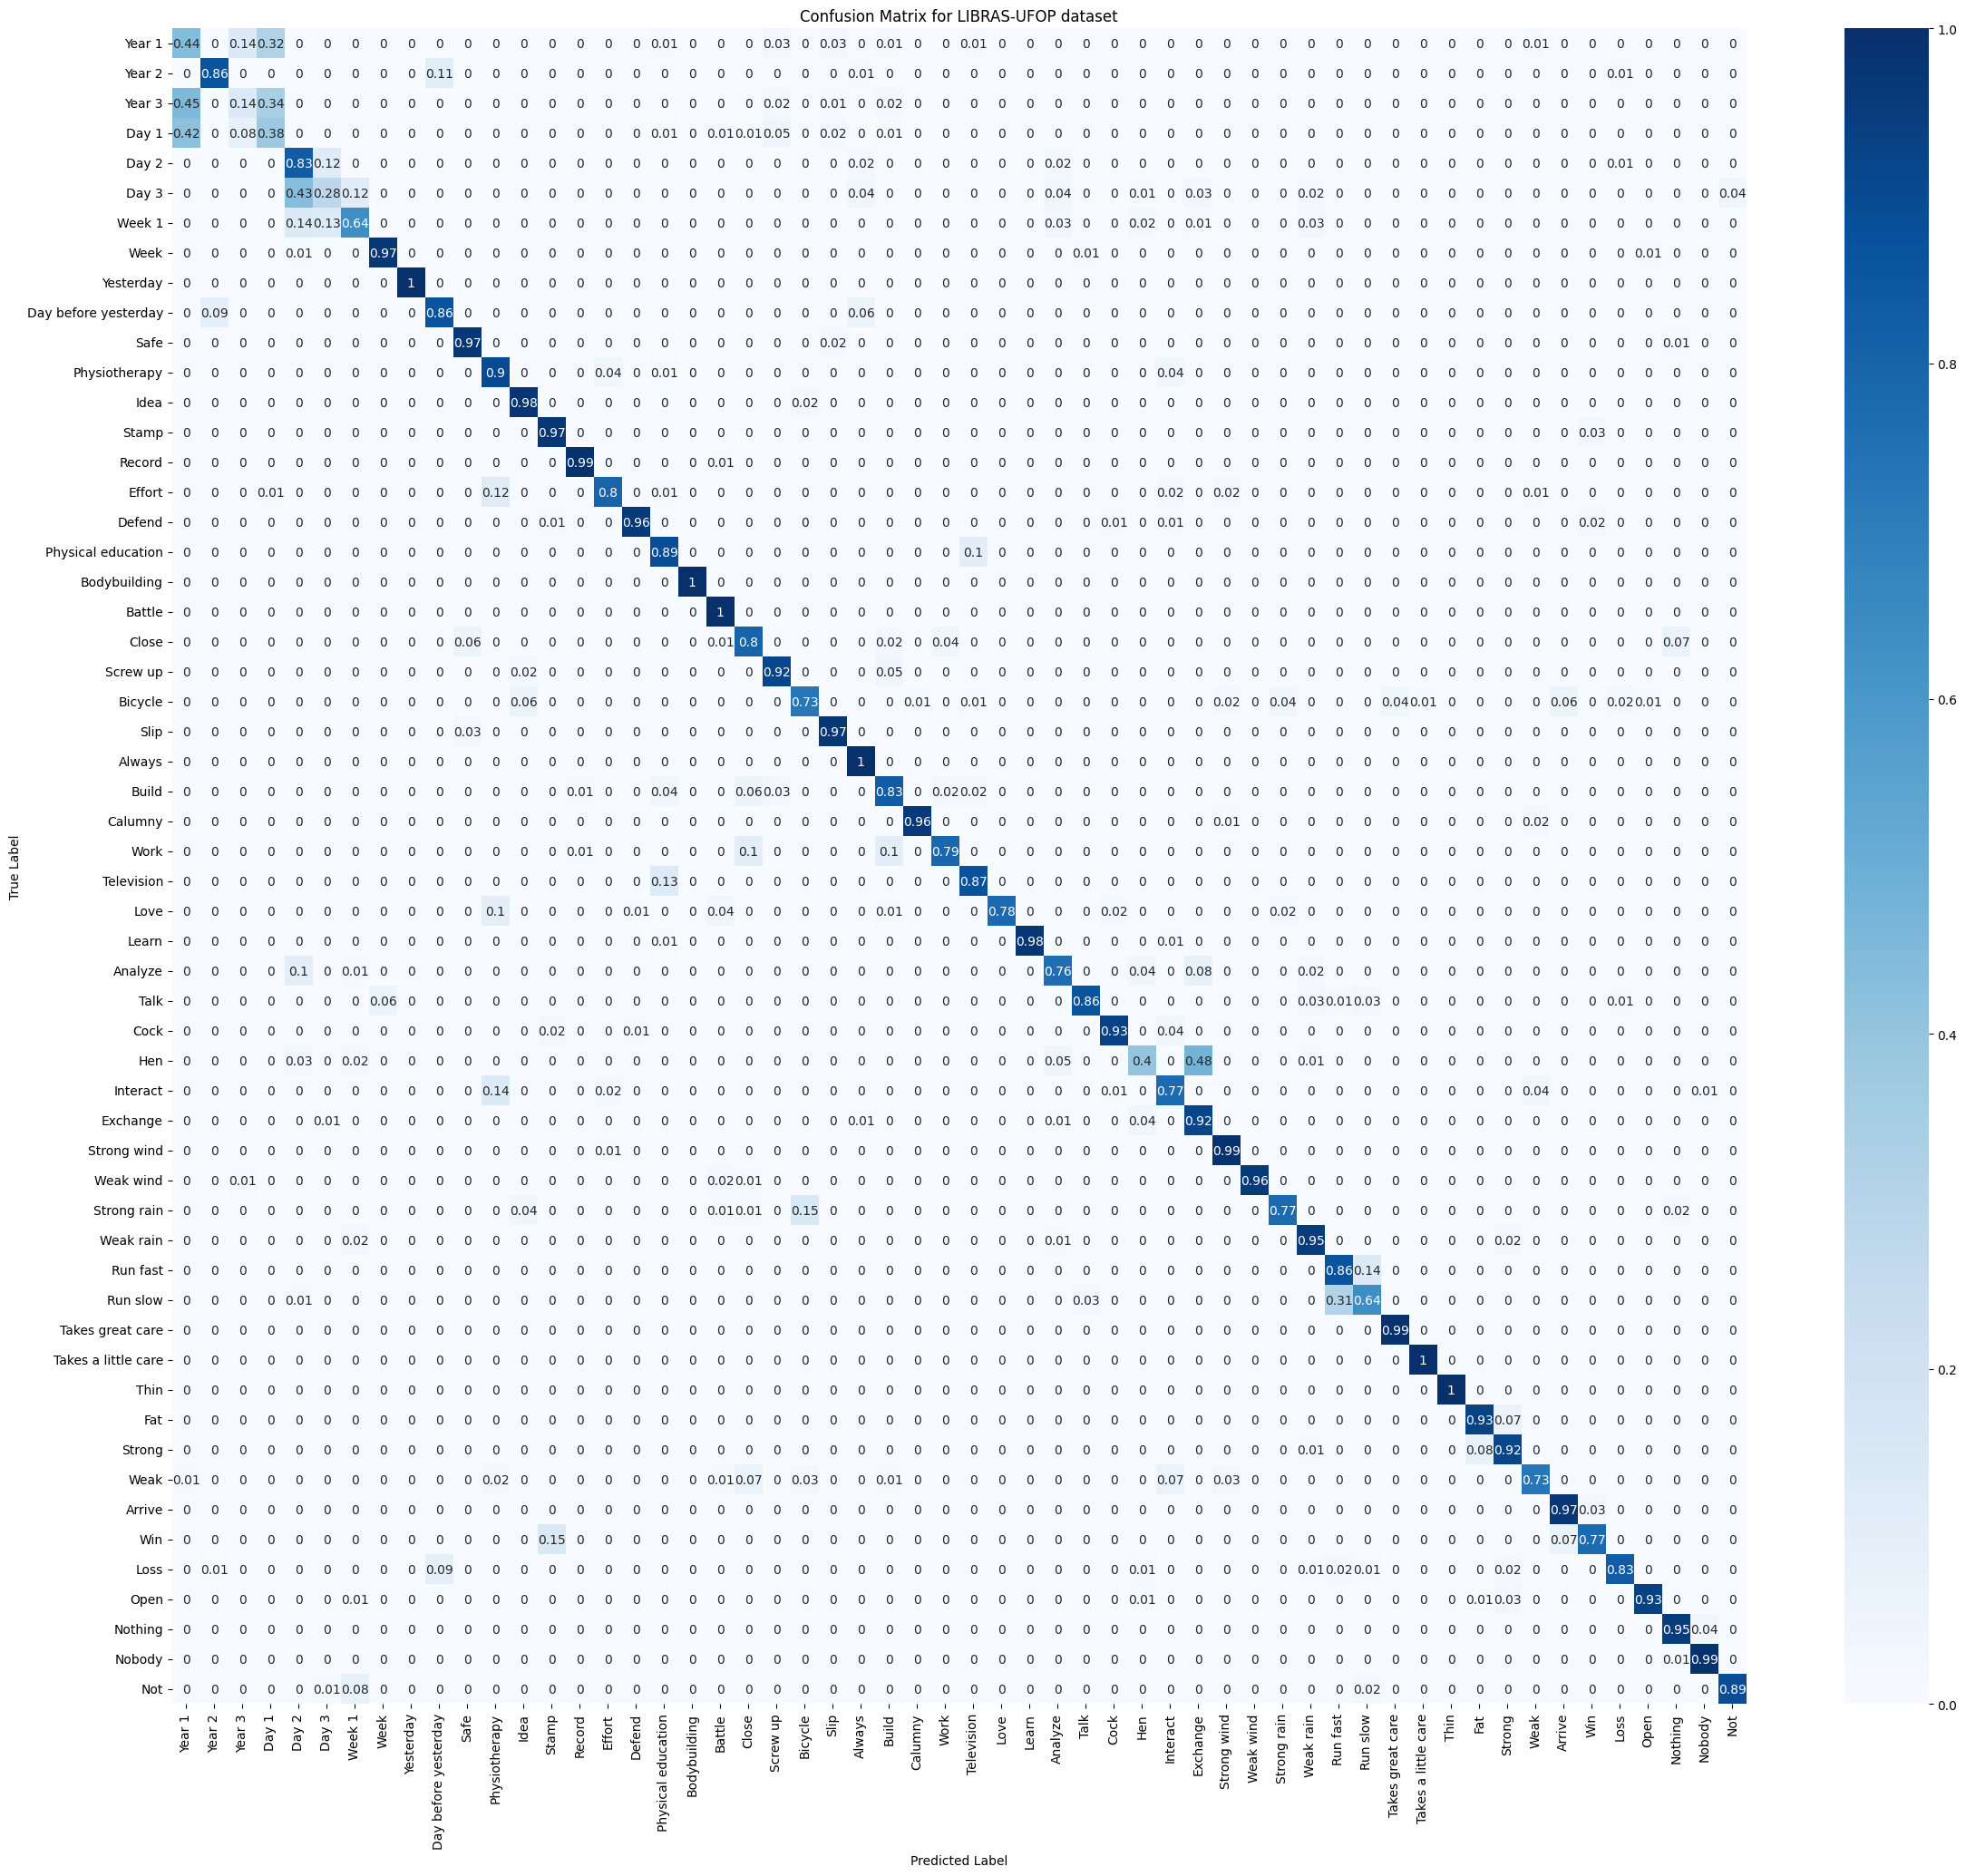

In [170]:
all_true_labels = functools.reduce(lambda a, b: a+b, [i["true_labels"] for i in results])
all_predicted_labels = functools.reduce(lambda a, b: a+b, [i["predicted_labels"] for i in results])

conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels, normalize="true")
plt.figure(figsize=(28, 24))
sns.heatmap(conf_matrix.round(2), annot=True, cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for " + dataset_normalized_name + " dataset")

plt.show()